In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split


In [17]:
hit = pd.read_csv("ml_2_dogrusal_reg_kuzenleri/Hitters.csv")
df = hit.copy()
df.dropna()
df = df.dropna(subset = ["Salary"])

dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
X_ = pd.concat([X_, dms[["League_N","Division_W","NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_
                                                    ,y
                                                   ,test_size = 0.25
                                                   ,random_state =42 )


ValueError: Found input variables with inconsistent numbers of samples: [322, 263]

In [15]:
df.Salary.isna().sum()

0

In [18]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [19]:
ridge_model

Ridge(alpha=0.1)

In [20]:
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

Text(0.5, 1.0, 'Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları')

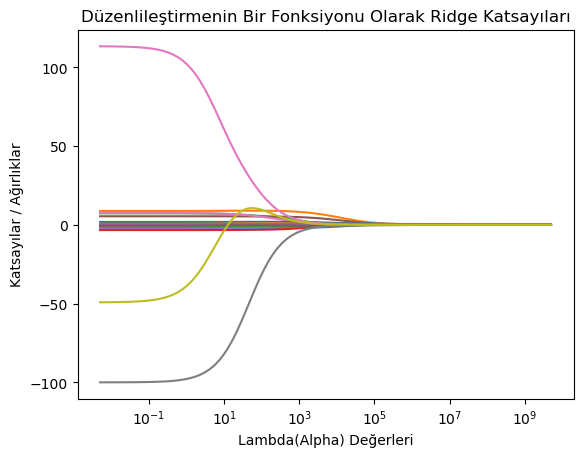

In [22]:
import matplotlib.pyplot as plt
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha  = i)
    ridge_model.fit(X_train,y_train)
    katsayilar.append(ridge_model.coef_)
    
    
    
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log")

plt.xlabel("Lambda(Alpha) Değerleri")
plt.ylabel("Katsayılar / Ağırlıklar")
plt.title("Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları")

In [23]:
y_pred = ridge_model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.05179222828326

In [33]:
from sklearn.preprocessing import StandardScaler

lambdalar = 10**np.linspace(10,-2,100)*0.5
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


In [37]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar,
                   scoring = "neg_mean_squared_error"
                   )

In [38]:
ridge_cv.fit(X_scaled, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        scoring='neg_mean_squared_error')

In [39]:
ridge_cv.alpha_

152.69277544167062

In [40]:
ridge_tuned = Ridge(alpha = ridge_cv.alpha_,
                   ).fit(X_scaled,y_train)

In [41]:
np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(X_test)))

/Users/fatihozkan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


197428.54519565013